In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\DEBANJAN\Desktop\New folder\adidas_sales_US.csv', encoding='unicode_escape')

In [4]:
df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit (in $),Units Sold,Total Sales (in $),Operating Profit (in $),Operating Margin,Sales Method,Unnamed: 13,Unnamed: 14
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,50,"1,200","6,00,000","3,00,000",50%,In-store,NaN,NaN
1,Foot Locker,1185732,01-02-2020,Northeast,New York,New York,Men's Athletic Footwear,50,"1,000","5,00,000","1,50,000",30%,In-store,NaN,NaN
2,Foot Locker,1185732,01-03-2020,Northeast,New York,New York,Women's Street Footwear,40,"1,000","4,00,000","1,40,000",35%,In-store,NaN,NaN
3,Foot Locker,1185732,01-04-2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,"3,82,500","1,33,875",35%,In-store,NaN,NaN
4,Foot Locker,1185732,01-05-2020,Northeast,New York,New York,Men's Apparel,60,900,"5,40,000","1,62,000",30%,In-store,NaN,NaN
5,Foot Locker,1185732,01-06-2020,Northeast,New York,New York,Women's Apparel,50,"1,000","5,00,000","1,25,000",25%,In-store,NaN,NaN
6,Foot Locker,1185732,01-07-2020,Northeast,New York,New York,Men's Street Footwear,50,"1,250","6,25,000","3,12,500",50%,In-store,NaN,NaN
7,Foot Locker,1185732,01-08-2020,Northeast,New York,New York,Men's Athletic Footwear,50,900,"4,50,000","1,35,000",30%,Outlet,NaN,NaN
8,Foot Locker,1185732,1/21/2020,Northeast,New York,New York,Women's Street Footwear,40,950,"3,80,000","1,33,000",35%,Outlet,NaN,NaN
9,Foot Locker,1185732,1/22/2020,Northeast,New York,New York,Women's Athletic Footwear,45,825,"3,71,250","1,29,937",35%,Outlet,NaN,NaN


In [5]:
df = df.drop(columns=['Unnamed: 13', 'Unnamed: 14'])

In [6]:
df.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit (in $),Units Sold,Total Sales (in $),Operating Profit (in $),Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,50,"1,200","6,00,000","3,00,000",50%,In-store
1,Foot Locker,1185732,01-02-2020,Northeast,New York,New York,Men's Athletic Footwear,50,"1,000","5,00,000","1,50,000",30%,In-store
2,Foot Locker,1185732,01-03-2020,Northeast,New York,New York,Women's Street Footwear,40,"1,000","4,00,000","1,40,000",35%,In-store
3,Foot Locker,1185732,01-04-2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,"3,82,500","1,33,875",35%,In-store
4,Foot Locker,1185732,01-05-2020,Northeast,New York,New York,Men's Apparel,60,900,"5,40,000","1,62,000",30%,In-store


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Retailer                 9648 non-null   object
 1   Retailer ID              9648 non-null   int64 
 2   Invoice Date             9648 non-null   object
 3   Region                   9648 non-null   object
 4   State                    9648 non-null   object
 5   City                     9648 non-null   object
 6   Product                  9648 non-null   object
 7   Price per Unit (in $)    9648 non-null   int64 
 8   Units Sold               9648 non-null   object
 9   Total Sales (in $)       9648 non-null   object
 10  Operating Profit (in $)  9648 non-null   object
 11  Operating Margin         9648 non-null   object
 12  Sales Method             9648 non-null   object
dtypes: int64(2), object(11)
memory usage: 980.0+ KB


<h2>DATA CLEANING :</h2><br>
<p>Few dates are seperated by "-" and few by "/"</p>

In [8]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit (in $)', 'Units Sold', 'Total Sales (in $)',
       'Operating Profit (in $)', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [9]:
import pandas as pd

# Function to parse dates with different formats
def parse_date(date_str):
    for fmt in ('%d-%m-%Y', '%d/%m/%Y', '%m/%d/%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt, dayfirst=True)
        except ValueError:
            pass
    return pd.to_datetime(date_str)  # Fallback to automatic parsing

# Apply the function to the 'Invoice Date' column
df['Invoice Date'] = df['Invoice Date'].apply(parse_date)

# Format dates to 'day-month-year' with '-' as separator
df['Invoice Date'] = df['Invoice Date'].dt.strftime('%d-%m-%Y')

# Display the DataFrame to verify changes
print(df.head(10))


      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   01-01-2020  Northeast  New York  New York   
1  Foot Locker      1185732   01-02-2020  Northeast  New York  New York   
2  Foot Locker      1185732   01-03-2020  Northeast  New York  New York   
3  Foot Locker      1185732   01-04-2020  Northeast  New York  New York   
4  Foot Locker      1185732   01-05-2020  Northeast  New York  New York   
5  Foot Locker      1185732   01-06-2020  Northeast  New York  New York   
6  Foot Locker      1185732   01-07-2020  Northeast  New York  New York   
7  Foot Locker      1185732   01-08-2020  Northeast  New York  New York   
8  Foot Locker      1185732   21-01-2020  Northeast  New York  New York   
9  Foot Locker      1185732   22-01-2020  Northeast  New York  New York   

                     Product  Price per Unit (in $) Units Sold  \
0      Men's Street Footwear                     50      1,200   
1    Men's Athletic Footwear              

<h3>Missing values:</h3><br>
<p>Check for it . If exist remove or replace .

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

Retailer                   0
Retailer ID                0
Invoice Date               0
Region                     0
State                      0
City                       0
Product                    0
Price per Unit (in $)      0
Units Sold                 0
Total Sales (in $)         0
Operating Profit (in $)    0
Operating Margin           0
Sales Method               0
dtype: int64


In [11]:
df.dtypes

Retailer                   object
Retailer ID                 int64
Invoice Date               object
Region                     object
State                      object
City                       object
Product                    object
Price per Unit (in $)       int64
Units Sold                 object
Total Sales (in $)         object
Operating Profit (in $)    object
Operating Margin           object
Sales Method               object
dtype: object

<h4>Descriptive Statistics and Initial Insights</h4><br><br>
Summary Statistics:


In [12]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit (in $)', 'Units Sold', 'Total Sales (in $)',
       'Operating Profit (in $)', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [13]:
import pandas as pd
df['Operating Margin'] = df['Operating Margin'].astype(str).str.replace('%', '').str.replace(',', '')

# Step 2: Convert to float (to handle any decimal points first)
df['Operating Margin'] = pd.to_numeric(df['Operating Margin'], errors='coerce')

# Step 3: Handle non-finite values, fill NaNs with 0 or another appropriate value
df['Operating Margin'] = df['Operating Margin'].fillna(0)

# Step 4: Convert to int
df['Operating Margin'] = df['Operating Margin'].astype(int)

# Verify the change
print(df.dtypes)

Retailer                   object
Retailer ID                 int64
Invoice Date               object
Region                     object
State                      object
City                       object
Product                    object
Price per Unit (in $)       int64
Units Sold                 object
Total Sales (in $)         object
Operating Profit (in $)    object
Operating Margin            int32
Sales Method               object
dtype: object


In [14]:
numeric_columns = ['Units Sold', 'Total Sales (in $)', 'Operating Profit (in $)']
df[numeric_columns] = df[numeric_columns].replace(',', '', regex=True).astype(float)

# Verify the changes
print(df.dtypes)

Retailer                    object
Retailer ID                  int64
Invoice Date                object
Region                      object
State                       object
City                        object
Product                     object
Price per Unit (in $)        int64
Units Sold                 float64
Total Sales (in $)         float64
Operating Profit (in $)    float64
Operating Margin             int32
Sales Method                object
dtype: object


In [15]:
df.describe()

,Retailer ID,Price per Unit (in $),Units Sold,Total Sales (in $),Operating Profit (in $),Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.269071,42.299129
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.121969,9.719742
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,10.000000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1922.000000,35.000000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.500000,41.000000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52063.000000,49.000000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,80.000000


Distribution Analysis:

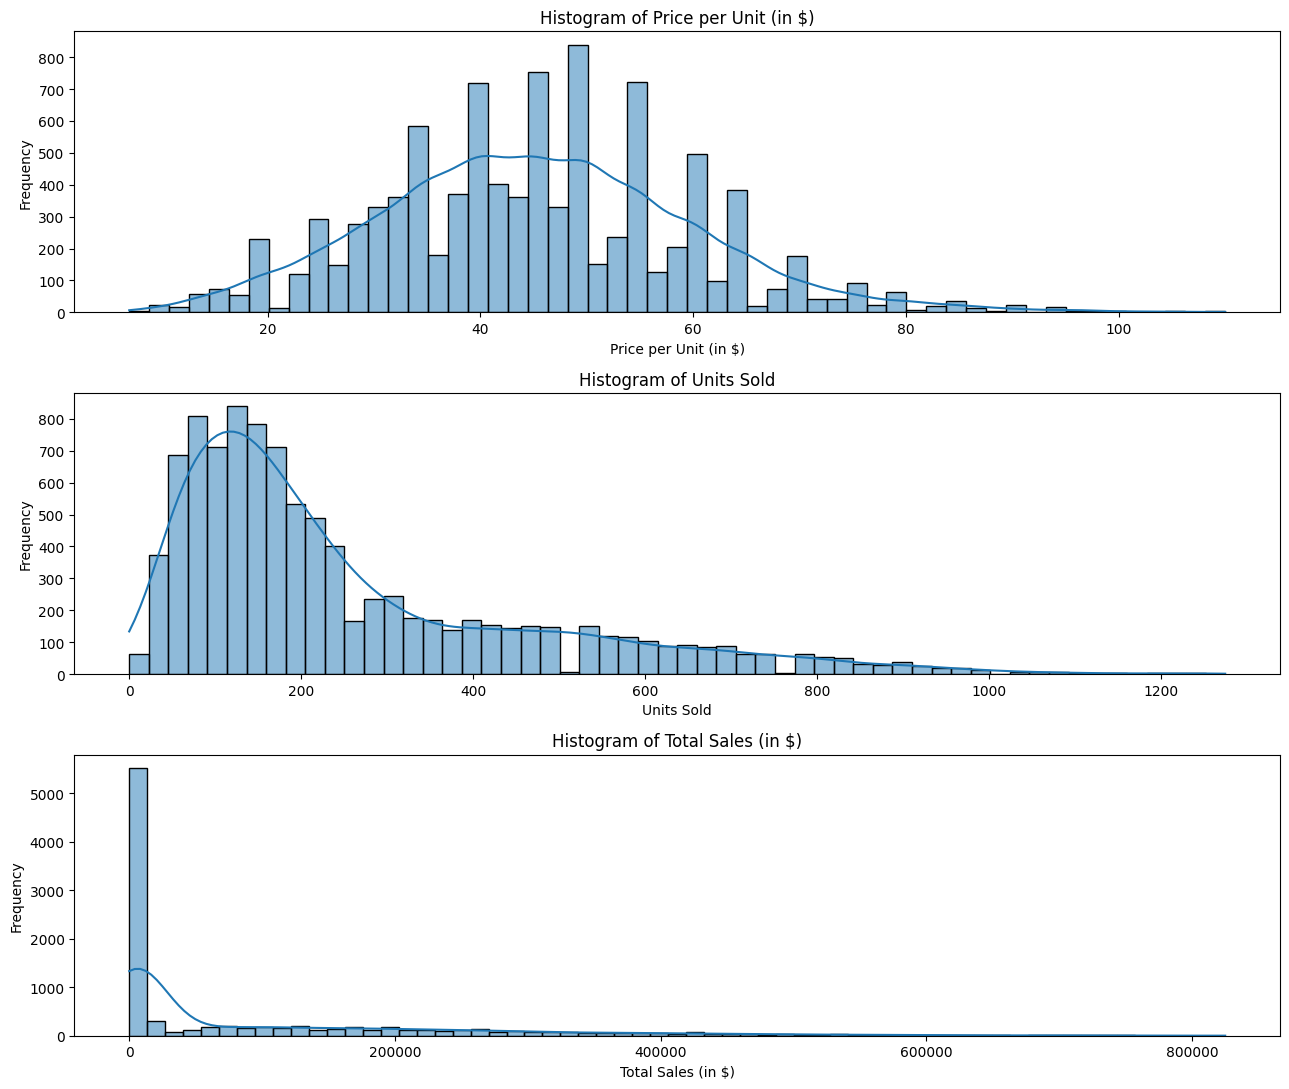

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your pre-loaded DataFrame

# Select numerical columns for visualization
numerical_columns = ['Price per Unit (in $)', 'Units Sold', 'Total Sales (in $)']

# Set up figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(13, 11))
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



<h4>Explore Categorical Variables:</h4><br><br>
<b>Unique values:</b><br>
o	Count and visualize unique values in categorical columns (e.g., Retailer, Region, Product).

In [17]:
import pandas as pd
categorical_columns = ['Retailer', 'Region', 'Product','Sales Method']

# Count unique values in each categorical column and print
for column in categorical_columns:
    unique_counts = df[column].value_counts()
    print(f"Unique values in '{column}':")
    print(unique_counts)
    print()  # Empty line for separation


Unique values in 'Retailer':
Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

Unique values in 'Region':
Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

Unique values in 'Product':
Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

Unique values in 'Sales Method':
Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64



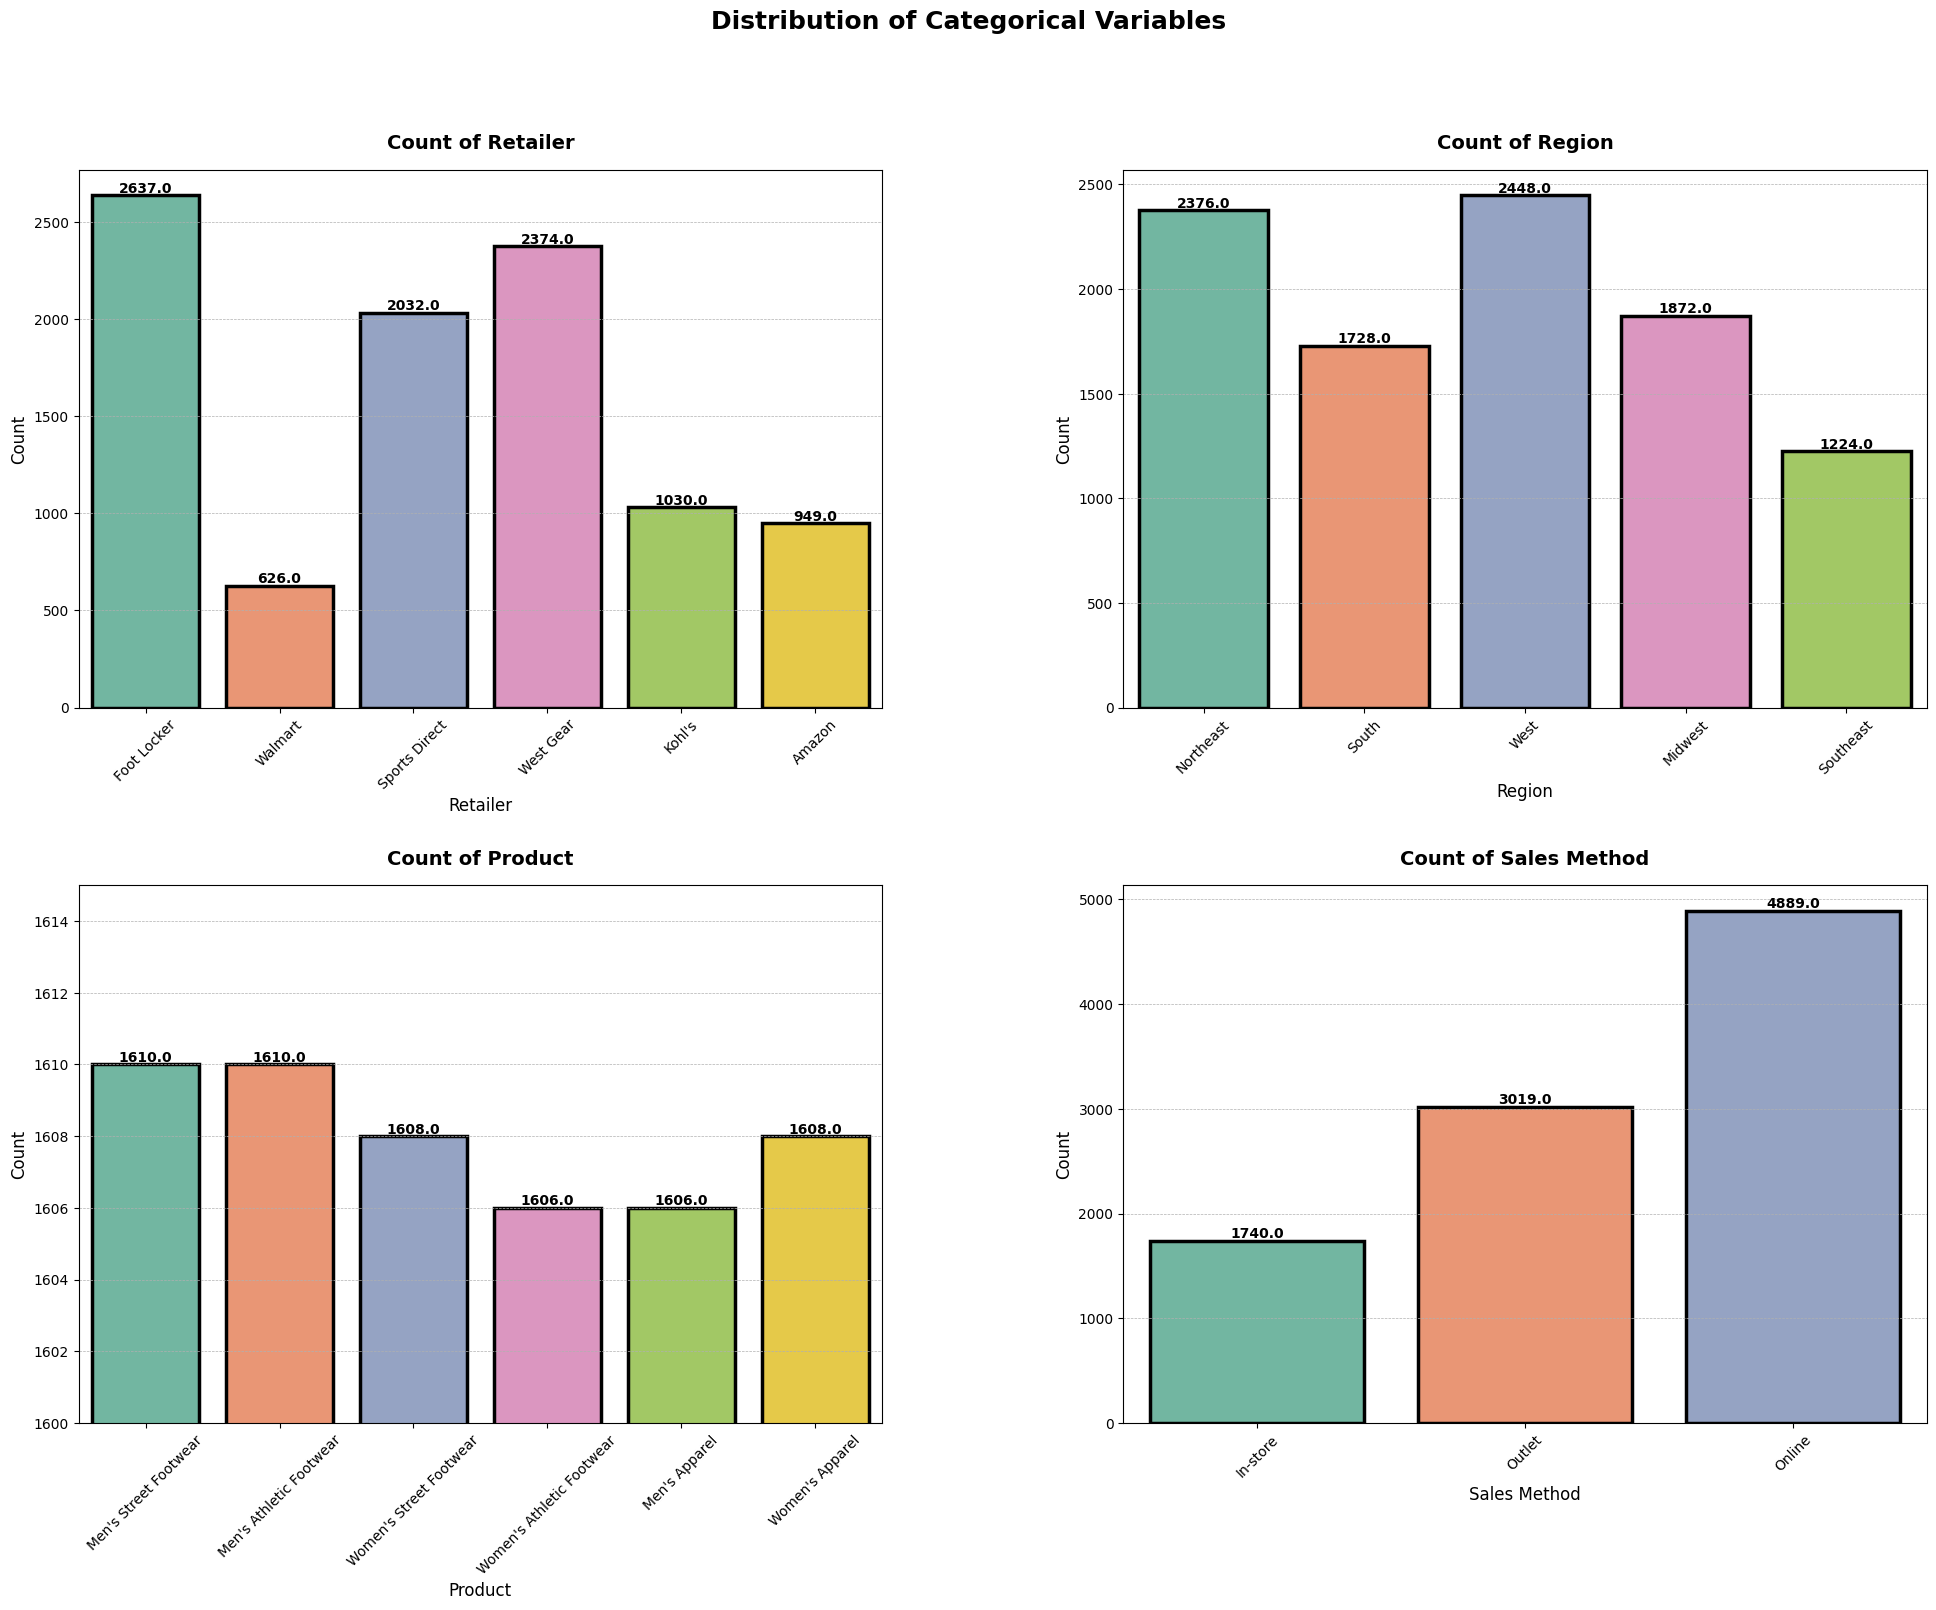

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your pre-loaded DataFrame

# List of categorical columns to explore, including 'Sales Method'
categorical_columns = ['Retailer', 'Region', 'Product', 'Sales Method']

# Set up figure and axes for subplots with larger dimensions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
axes = axes.flatten()

# Plot countplots for each categorical column
for i, column in enumerate(categorical_columns):
    # Determine unique categories in the column
    unique_categories = df[column].nunique()
    
    # Define a color palette based on unique categories
    palette = sns.color_palette('Set2', n_colors=unique_categories)
    
    if column == 'Product':
        ax = sns.countplot(x=column, data=df, ax=axes[i], palette=palette, edgecolor='black', linewidth=2.5,
                           hue=df[column], legend=False)
        ax.set_ylim(1600, 1615)
        ax.set_yticks(range(1600, 1616, 2))
    else:
        ax = sns.countplot(x=column, data=df, ax=axes[i], palette=palette, edgecolor='black', linewidth=2.5,
                           hue=df[column], legend=False)
    
    # Add counts above bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points', weight='bold')
    
    axes[i].set_title(f'Count of {column}', fontsize=14, fontweight='bold', pad=15)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y', linestyle='--', linewidth=0.5)  # Add grid lines

# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Add a title to the entire figure
fig.suptitle('Distribution of Categorical Variables', fontsize=18, fontweight='bold', y=1.02)

# Remove default legend and adjust layout
fig.subplots_adjust(top=0.92, wspace=0.3)

plt.show()


<h4>Popular items:</h4><br>
o	Determine top products, best-performing retailers, or preferred sales methods based on frequency


Top Products

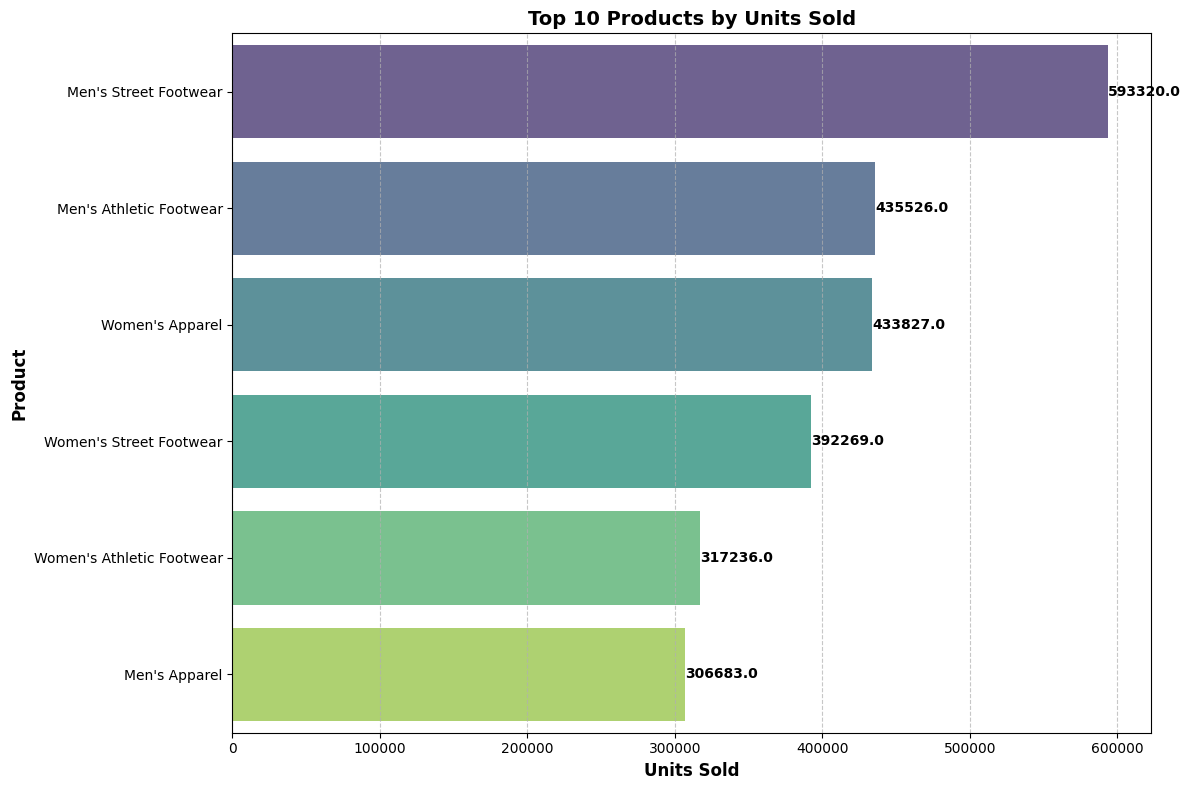

In [19]:
top_products = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False).head(10)

# Define custom colors for the plot
colors = sns.color_palette('viridis', n_colors=len(top_products))

# Plotting the top products with enhanced aesthetics
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, palette=colors, hue=top_products.index, dodge=False, alpha=0.8)
plt.xlabel('Units Sold', fontsize=12, fontweight='bold')
plt.ylabel('Product', fontsize=12, fontweight='bold')
plt.title('Top 10 Products by Units Sold', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels (units sold) on each bar
for i, v in enumerate(top_products.values):
    plt.text(v + 10, i, str(v), color='black', fontsize=10, va='center', fontweight='bold')

plt.tight_layout()
plt.show()

Top 10 Products by total Sales:

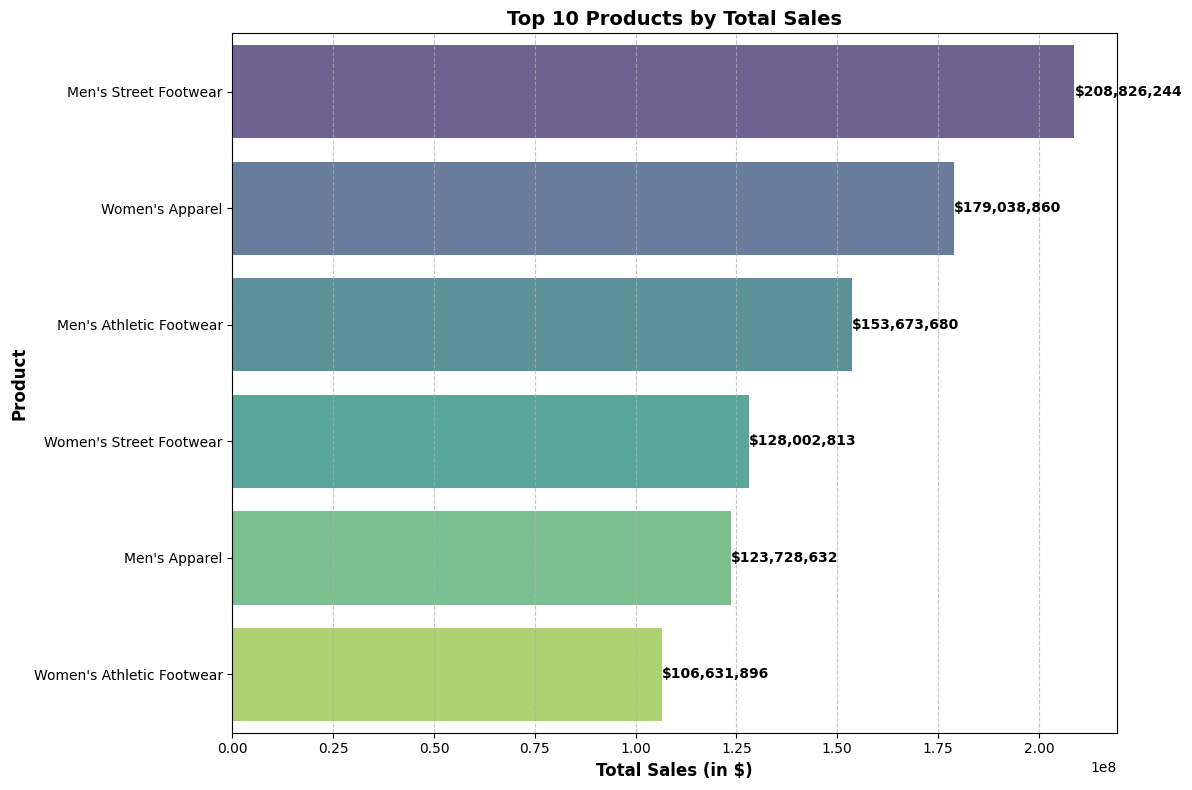

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your pre-loaded DataFrame

# Group by 'Product' and sum the 'Total Sales (in $)' to find total sales per product
top_products_sales = df.groupby('Product')['Total Sales (in $)'].sum().sort_values(ascending=False).head(10)

# Define custom colors for the plot
colors = sns.color_palette('viridis', n_colors=len(top_products_sales))

# Plotting the top products by total sales
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products_sales.values, y=top_products_sales.index, palette=colors, hue=top_products_sales.index, dodge=False, alpha=0.8)
plt.xlabel('Total Sales (in $)', fontsize=12, fontweight='bold')
plt.ylabel('Product', fontsize=12, fontweight='bold')
plt.title('Top 10 Products by Total Sales', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels (total sales) on each bar
for i, v in enumerate(top_products_sales.values):
    plt.text(v + 100, i, f'${v:,.0f}', color='black', fontsize=10, va='center', fontweight='bold')

plt.tight_layout()
plt.show()


Top Performing retailers (By Units Sold) :

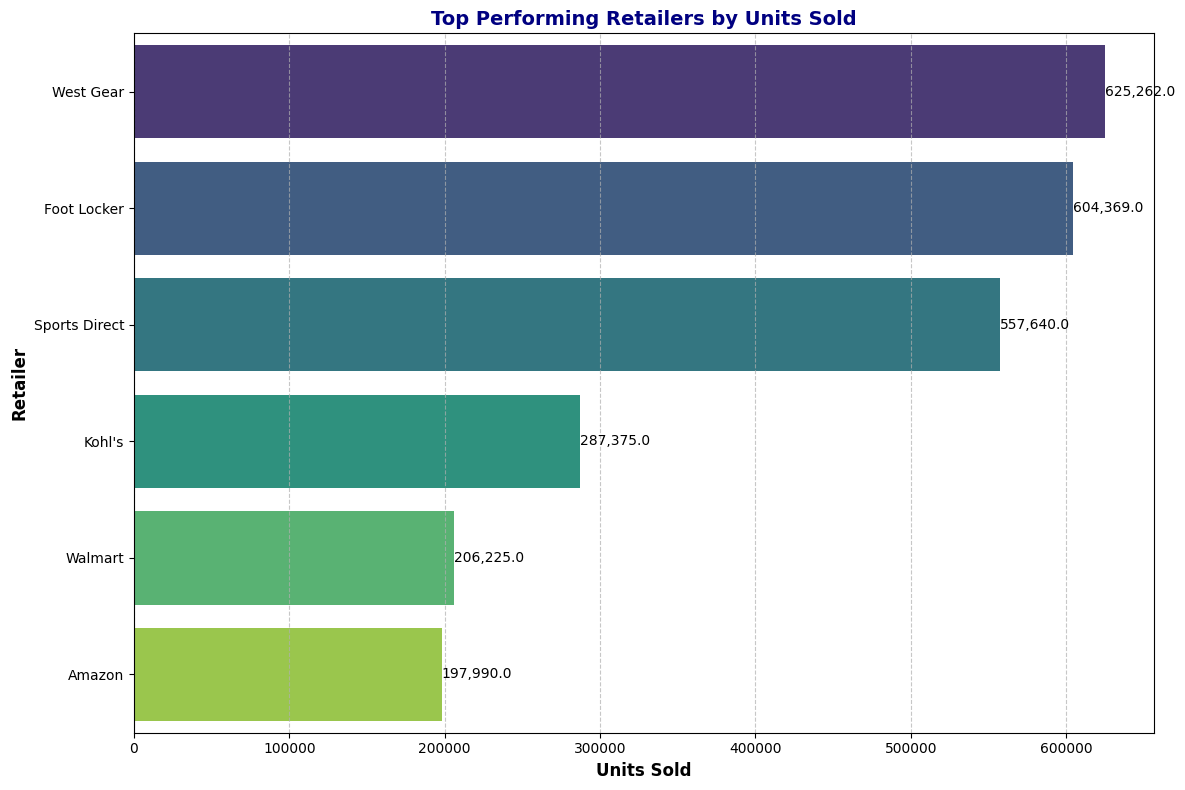

In [21]:
# Group by 'Retailer' and sum the 'Units Sold' to find total units sold per retailer
top_retailers_units_sold = df.groupby('Retailer')['Units Sold'].sum().sort_values(ascending=False).head(10)

# Prepare data for plotting
retailers = top_retailers_units_sold.index
units_sold = top_retailers_units_sold.values

# Create a figure and axis
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plotting the data using a horizontal bar plot
sns.barplot(x=units_sold, y=retailers, hue=retailers, palette='viridis', dodge=False, ax=ax)

# Adding annotations (units sold) on each bar with improved spacing and styling
for i, (retailer, units) in enumerate(zip(retailers, units_sold)):
    ax.text(units + 50, i, f'{units:,}', fontsize=10, ha='left', va='center', color='black')

# Adding labels and title with enhanced font and style
ax.set_xlabel('Units Sold', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('Retailer', fontsize=12, fontweight='bold', color='black')
ax.set_title('Top Performing Retailers by Units Sold', fontsize=14, fontweight='bold', color='navy')

# Customize gridlines for better visual separation
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Enhance tick labels with alignment and style
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Adjust plot limits and layout
plt.tight_layout()

# Show plot
plt.show()

Top Performing Retailers (By Total Sales):

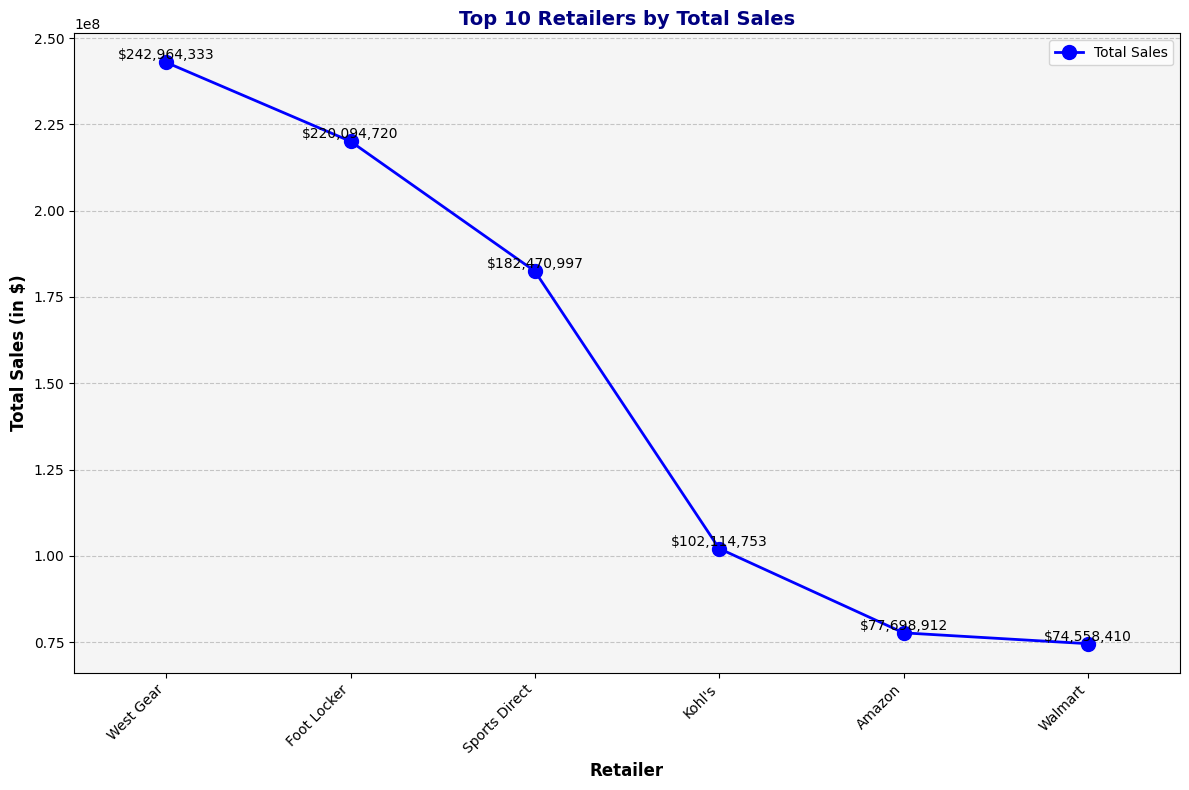

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
top_retailers = df.groupby('Retailer')['Total Sales (in $)'].sum().sort_values(ascending=False).head(10)

# Prepare data for plotting
retailers = top_retailers.index
sales = top_retailers.values

# Create a figure and axis
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plotting the data points as dots connected by lines with customized markers and lines
ax.plot(retailers, sales, marker='o', linestyle='-', color='b', markersize=10, linewidth=2, label='Total Sales')

# Adding annotations (sales figures) above each dot with improved spacing and styling
for retailer, sale in zip(retailers, sales):
    ax.text(retailer, sale + 1000, f'${sale:,.0f}', fontsize=10, ha='center', va='bottom', color='black')

# Adding labels and title with enhanced font and style
ax.set_xlabel('Retailer', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('Total Sales (in $)', fontsize=12, fontweight='bold', color='black')
ax.set_title('Top 10 Retailers by Total Sales', fontsize=14, fontweight='bold', color='navy')

# Customize gridlines for better visual separation
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Enhance tick labels with rotation and alignment
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Adjust plot limits and layout
ax.set_xlim(left=-0.5, right=len(retailers)-0.5)  # Adjust x-axis limits for better alignment
plt.tight_layout()

# Add legend for clarity
ax.legend(loc='upper right', fontsize=10)

# Customize background color for aesthetic appeal
ax.set_facecolor('whitesmoke')

plt.show()


<h5>Preferred Sales Method :</h5>

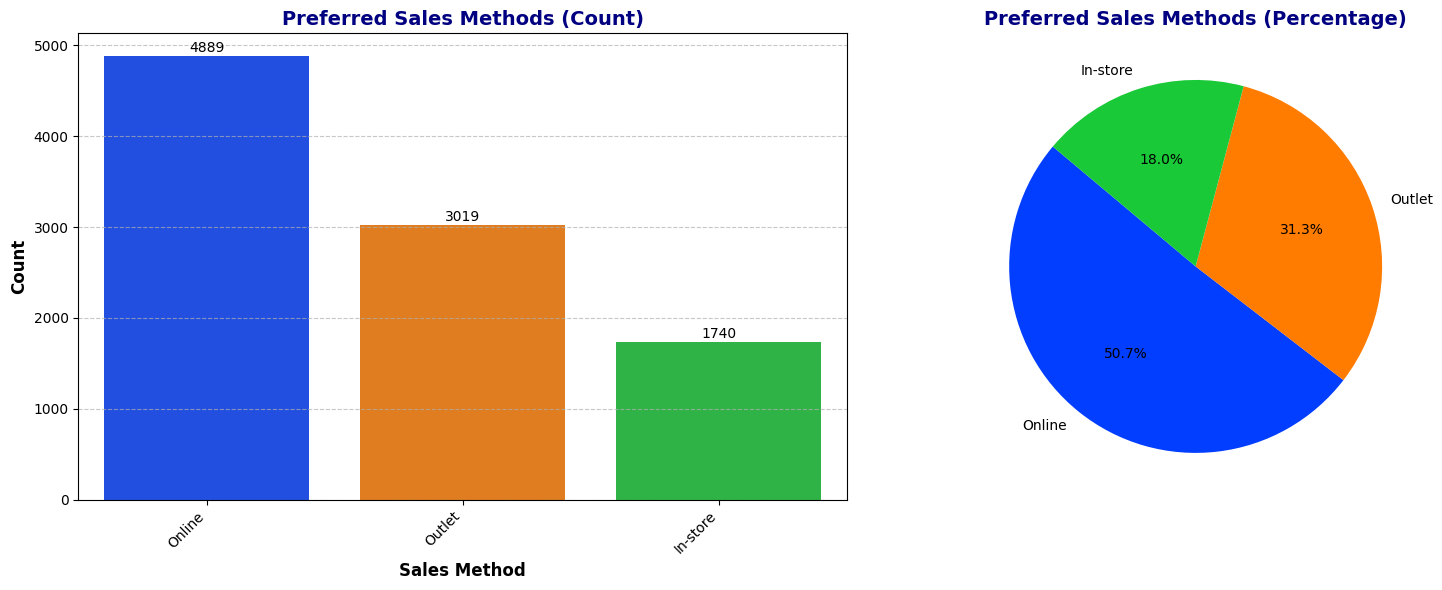

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your pre-loaded DataFrame

# Count the occurrences of each sales method
sales_method_counts = df['Sales Method'].value_counts()

# Prepare data for plotting
methods = sales_method_counts.index
counts = sales_method_counts.values

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Define bright colors for the bar plot
colors = sns.color_palette('bright', n_colors=len(methods))

# Plotting the vertical bar plot on the first subplot
sns.barplot(x=methods, y=counts, hue=methods, palette=colors, ax=ax1, dodge=False)

# Adding annotations (counts) on each bar with improved spacing and styling
for i, (method, count) in enumerate(zip(methods, counts)):
    ax1.text(i, count + 10, f'{count}', fontsize=10, ha='center', va='bottom', color='black')

# Adding labels and title to the first subplot
ax1.set_xlabel('Sales Method', fontsize=12, fontweight='bold', color='black')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold', color='black')
ax1.set_title('Preferred Sales Methods (Count)', fontsize=14, fontweight='bold', color='navy')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Setting explicit ticks and labels to avoid warning
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods, rotation=45, fontsize=10, ha='right', color='black')

# Plotting the percentage pie chart on the second subplot
ax2.pie(counts, labels=methods, autopct='%1.1f%%', colors=colors, startangle=140)
ax2.set_title('Preferred Sales Methods (Percentage)', fontsize=14, fontweight='bold', color='navy')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


<h5><b>Sales Performance Analysis:</b></h5><br>
Total Sales Trends: Time Series Analysis.

In [24]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit (in $)', 'Units Sold', 'Total Sales (in $)',
       'Operating Profit (in $)', 'Operating Margin', 'Sales Method'],
      dtype='object')

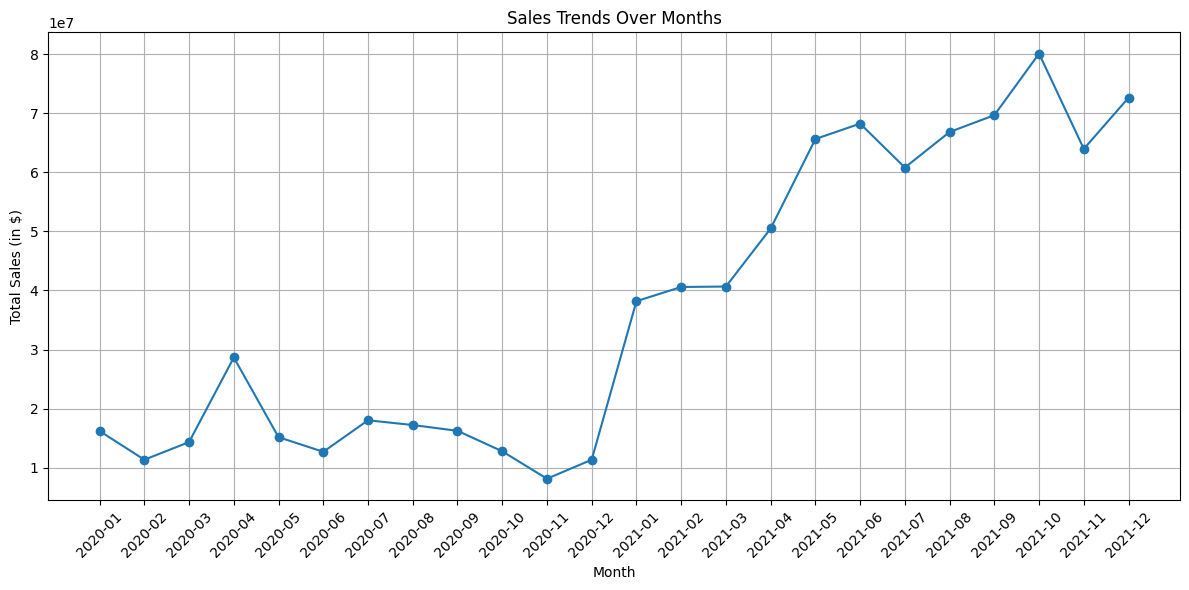

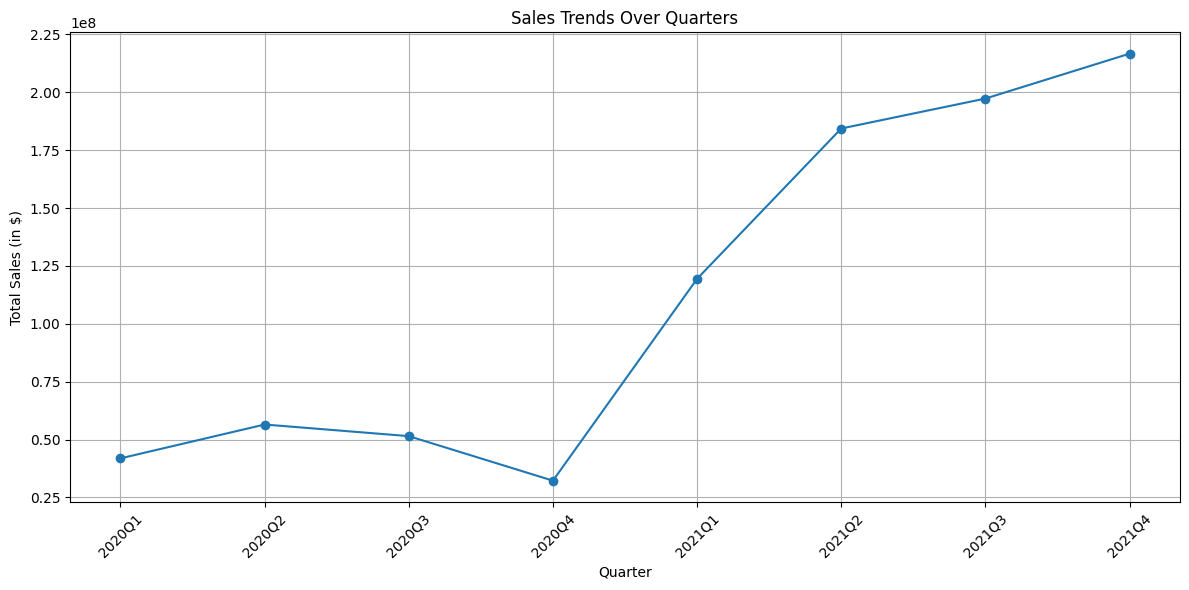

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded
# Convert 'Invoice Date' to datetime with dayfirst=True
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], dayfirst=True)

# Extract month and quarter information
df['Month'] = df['Invoice Date'].dt.to_period('M')
df['Quarter'] = df['Invoice Date'].dt.to_period('Q')

# Group by Month and Quarter and sum the 'Total Sales (in $)'
monthly_sales = df.groupby('Month')['Total Sales (in $)'].sum().reset_index()
quarterly_sales = df.groupby('Quarter')['Total Sales (in $)'].sum().reset_index()

# Plotting sales trends over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Total Sales (in $)'], marker='o')
plt.title('Sales Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Total Sales (in $)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting sales trends over quarters
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales['Quarter'].astype(str), quarterly_sales['Total Sales (in $)'], marker='o')
plt.title('Sales Trends Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (in $)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Sales Method trend over Months :

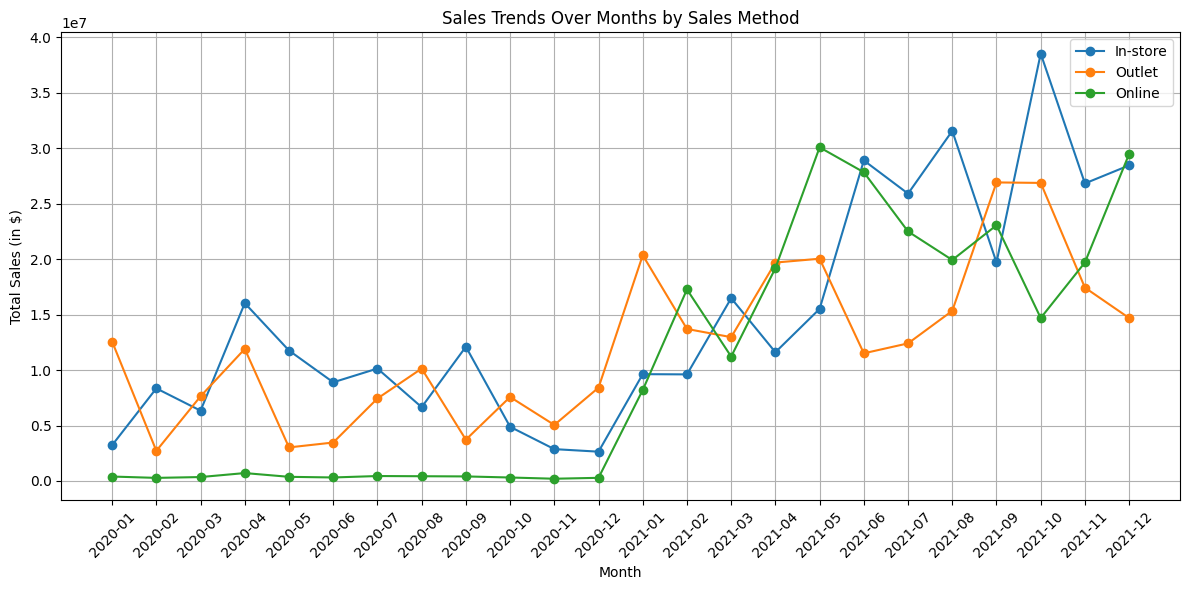

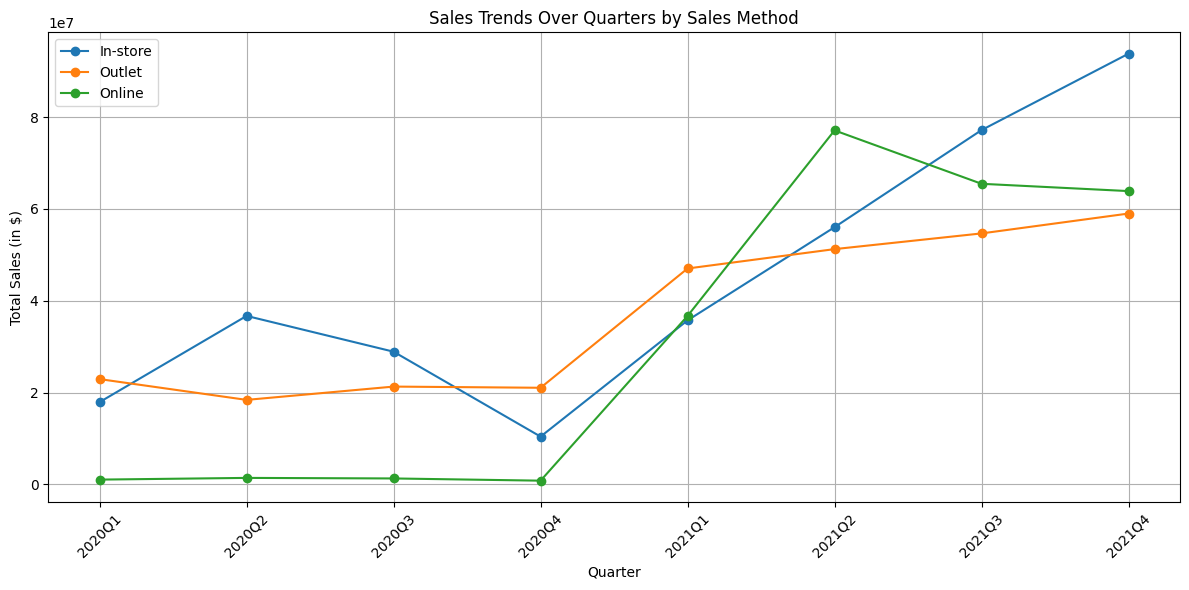

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded
# Convert 'Invoice Date' to datetime with dayfirst=True
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], dayfirst=True)

# Extract month and quarter information
df['Month'] = df['Invoice Date'].dt.to_period('M')
df['Quarter'] = df['Invoice Date'].dt.to_period('Q')

# Group by Month, Sales Method, and sum the 'Total Sales (in $)'
monthly_sales_method = df.groupby(['Month', 'Sales Method'])['Total Sales (in $)'].sum().reset_index()

# Plotting total sales trends over months
plt.figure(figsize=(12, 6))
for method in df['Sales Method'].unique():
    method_data = monthly_sales_method[monthly_sales_method['Sales Method'] == method]
    plt.plot(method_data['Month'].astype(str), method_data['Total Sales (in $)'], marker='o', label=method)

plt.title('Sales Trends Over Months by Sales Method')
plt.xlabel('Month')
plt.ylabel('Total Sales (in $)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Group by Quarter, Sales Method, and sum the 'Total Sales (in $)'
quarterly_sales_method = df.groupby(['Quarter', 'Sales Method'])['Total Sales (in $)'].sum().reset_index()

# Plotting total sales trends over quarters
plt.figure(figsize=(12, 6))
for method in df['Sales Method'].unique():
    method_data = quarterly_sales_method[quarterly_sales_method['Sales Method'] == method]
    plt.plot(method_data['Quarter'].astype(str), method_data['Total Sales (in $)'], marker='o', label=method)

plt.title('Sales Trends Over Quarters by Sales Method')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (in $)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Seasonal Pattern of Sales if any:

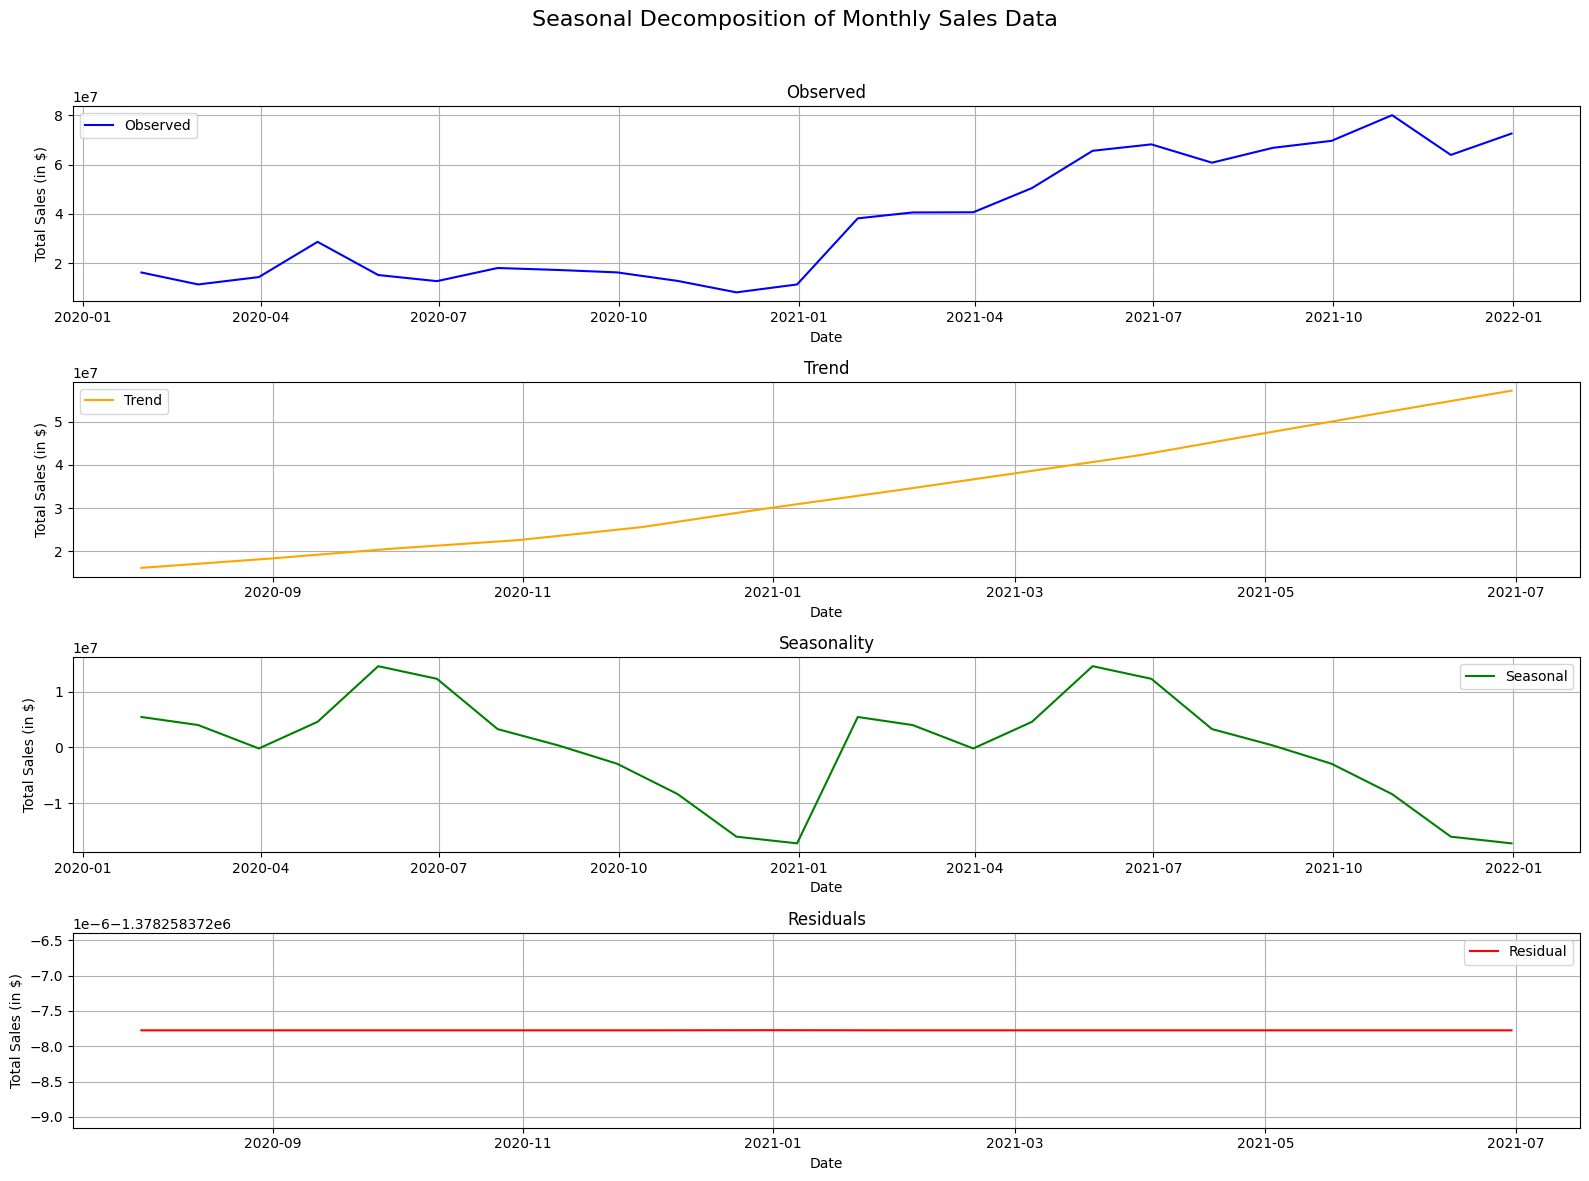

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Invoice Date' to datetime with dayfirst=True
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], dayfirst=True)

# Set 'Invoice Date' as the index
df.set_index('Invoice Date', inplace=True)

# Resample the data to monthly frequency and sum the sales
monthly_sales = df['Total Sales (in $)'].resample('ME').sum()

# Perform STL decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot the decomposition
plt.figure(figsize=(16, 12))
plt.suptitle('Seasonal Decomposition of Monthly Sales Data', fontsize=16)

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Observed')
plt.xlabel('Date')
plt.ylabel('Total Sales (in $)')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (in $)')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonality')
plt.xlabel('Date')
plt.ylabel('Total Sales (in $)')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Total Sales (in $)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<h5>Regional Analysis:</h5>


,Region,Total Sales,Number of Retailers,Total Operating Profit,Avg Sales per Retailer,Profitability Ratio
4,West,"$269,943,182",6,"$89,609,497","$44,990,530",33.20%
1,Northeast,"$186,324,067",6,"$68,020,645","$31,054,011",36.51%
3,Southeast,"$163,171,236",5,"$60,555,452","$32,634,247",37.11%
2,South,"$144,663,181",6,"$61,138,023","$24,110,530",42.26%
0,Midwest,"$135,800,459",5,"$52,811,379","$27,160,092",38.89%


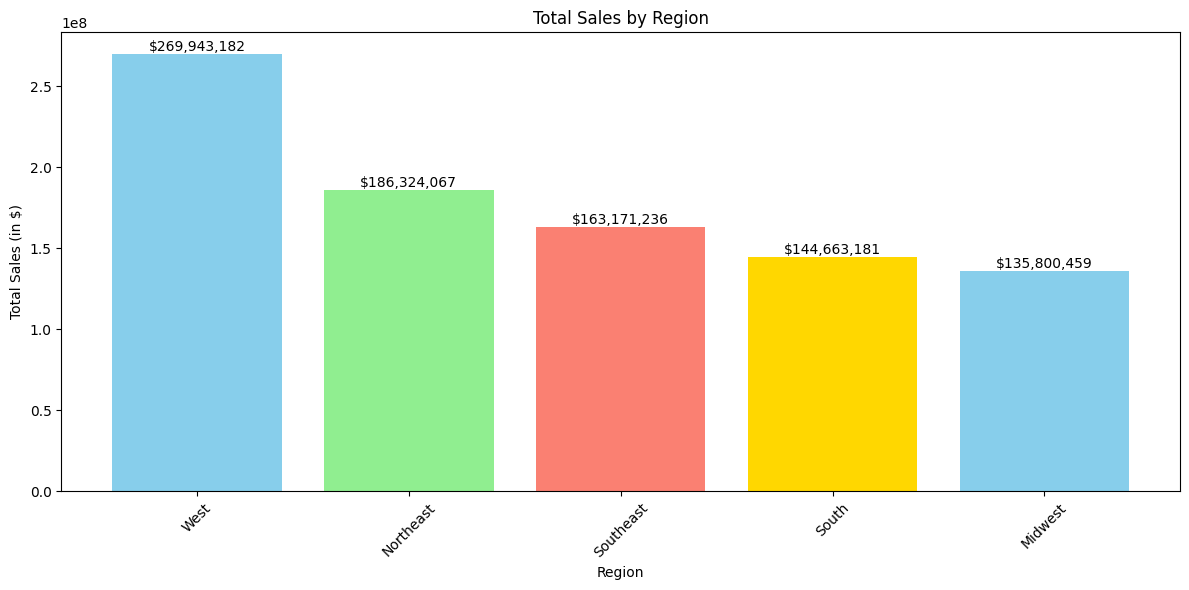

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# First, let's convert the relevant columns to numeric type
numeric_columns = ['Total Sales (in $)', 'Operating Profit (in $)']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now, let's proceed with the analysis
region_comparison = df.groupby('Region').agg({
    'Total Sales (in $)': 'sum',
    'Retailer': 'nunique',
    'Operating Profit (in $)': 'sum'
}).reset_index()

# Calculate average sales per retailer
region_comparison['Avg Sales per Retailer'] = region_comparison['Total Sales (in $)'] / region_comparison['Retailer']

# Calculate profitability ratio
region_comparison['Profitability Ratio'] = region_comparison['Operating Profit (in $)'] / region_comparison['Total Sales (in $)']

# Sort by Total Sales in descending order
region_comparison = region_comparison.sort_values('Total Sales (in $)', ascending=False)

# Rename columns for clarity
region_comparison = region_comparison.rename(columns={
    'Total Sales (in $)': 'Total Sales',
    'Retailer': 'Number of Retailers',
    'Operating Profit (in $)': 'Total Operating Profit'
})

# Display the results with formatting
styled_df = region_comparison.style.format({
    'Total Sales': '${:,.0f}',
    'Total Operating Profit': '${:,.0f}',
    'Avg Sales per Retailer': '${:,.0f}',
    'Profitability Ratio': '{:.2%}'
}).bar(subset=['Profitability Ratio'], color='#7FFFD4')

# Display the styled dataframe
display(styled_df)

# Plot Total Sales by Region
plt.figure(figsize=(12, 6))
bars = plt.bar(region_comparison['Region'], region_comparison['Total Sales'], color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in $)')
plt.xticks(rotation=45)

# Adding data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '${:,.0f}'.format(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


State Analysis:

In [38]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ensure Total Sales column is properly converted
df['Total Sales (in $)'] = pd.to_numeric(df['Total Sales (in $)'], errors='coerce')

# Group by State and calculate total sales
state_sales = df.groupby('State')['Total Sales (in $)'].sum().sort_values(ascending=False).reset_index()
state_sales = state_sales.rename(columns={'Total Sales (in $)': 'Total Sales'})

# Add state codes for mapping
state_codes = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

state_sales['State Code'] = state_sales['State'].map(state_codes)

# Create subplots
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "bar"}, {"type": "treemap"}],
                           [{"type": "choropleth", "colspan": 2}, None]],
                    subplot_titles=("Top 15 States by Total Sales", "Total Sales by State (Treemap)",
                                    "Total Sales by State (Map)"),
                    row_heights=[0.4, 0.6])

# 1. Bar chart of Total Sales by State
bar = go.Bar(x=state_sales.head(15)['State'], y=state_sales.head(15)['Total Sales'],
             marker_color=px.colors.sequential.Plasma[::-1])
fig.add_trace(bar, row=1, col=1)

# 2. Treemap of Total Sales by State
treemap = go.Treemap(
    labels=state_sales['State'],
    values=state_sales['Total Sales'],
    parents=[""] * len(state_sales),
    marker_colorscale='Plasma',
    hovertemplate='<b>%{label}</b><br>Total Sales: $%{value:,.2f}<extra></extra>'
)
fig.add_trace(treemap, row=1, col=2)

# 3. Choropleth map of Total Sales by State
choropleth = go.Choropleth(
    locations=state_sales['State Code'],
    z=state_sales['Total Sales'],
    locationmode='USA-states',
    colorscale='Plasma',
    colorbar_title="Total Sales ($)"
)
fig.add_trace(choropleth, row=2, col=1)

# Update layout
fig.update_layout(
    title_text="State Sales Analysis",
    height=1400,
    width=1200,
    geo_scope='usa'
)

fig.update_xaxes(tickangle=45, row=1, col=1)

# Update treemap layout
fig.update_traces(
    textinfo="label+value",
    texttemplate="<b>%{label}</b><br>$%{value:,.0f}",
    selector=dict(type='treemap')
)

fig.show()

<h5><b>Product Analysis:</b></h5>

In [35]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ensure numeric columns are properly converted
df['Total Sales (in $)'] = pd.to_numeric(df['Total Sales (in $)'], errors='coerce')
df['Operating Profit (in $)'] = pd.to_numeric(df['Operating Profit (in $)'], errors='coerce')

# Group by Product and calculate total sales and operating profit
product_analysis = df.groupby('Product').agg({
    'Total Sales (in $)': 'sum',
    'Operating Profit (in $)': 'sum'
}).reset_index()

# Calculate percentage contribution to total revenue
total_revenue = product_analysis['Total Sales (in $)'].sum()
product_analysis['Revenue Contribution %'] = (product_analysis['Total Sales (in $)'] / total_revenue) * 100

# Sort by Total Sales descending
product_analysis_sales = product_analysis.sort_values('Total Sales (in $)', ascending=False)

# Sort by Operating Profit descending
product_analysis_profit = product_analysis.sort_values('Operating Profit (in $)', ascending=False)

# Create subplots
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Top 10 Products by Total Sales", 
                                    "Top 10 Products by Operating Profit",
                                    "Top 10 Products by Revenue Contribution",
                                    "Revenue Contribution (Cumulative)"))

# 1. Bar chart of Top 10 Products by Total Sales
fig.add_trace(
    go.Bar(x=product_analysis_sales.head(10)['Product'], 
           y=product_analysis_sales.head(10)['Total Sales (in $)'],
           name="Total Sales"),
    row=1, col=1
)

# 2. Bar chart of Top 10 Products by Operating Profit
fig.add_trace(
    go.Bar(x=product_analysis_profit.head(10)['Product'], 
           y=product_analysis_profit.head(10)['Operating Profit (in $)'],
           name="Operating Profit"),
    row=1, col=2
)

# 3. Bar chart of Top 10 Products by Revenue Contribution
fig.add_trace(
    go.Bar(x=product_analysis_sales.head(10)['Product'], 
           y=product_analysis_sales.head(10)['Revenue Contribution %'],
           name="Revenue Contribution %"),
    row=2, col=1
)

# 4. Cumulative Revenue Contribution (Pareto Chart)
product_analysis_sorted = product_analysis.sort_values('Total Sales (in $)', ascending=False)
product_analysis_sorted['Cumulative %'] = product_analysis_sorted['Revenue Contribution %'].cumsum()

fig.add_trace(
    go.Scatter(x=product_analysis_sorted['Product'], 
               y=product_analysis_sorted['Cumulative %'],
               mode='lines+markers',
               name="Cumulative %"),
    row=2, col=2
)

# Update layout
fig.update_layout(height=1000, width=1200, title_text="Product Analysis")
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()



<h5><b>Correlation Among Different Factors:</b></h5><br>
Correlation Matrix

Correlation Matrix:
                         Price per Unit (in $)  Units Sold  Total Sales (in $)  Operating Profit (in $)  Operating Margin
Price per Unit (in $)                     1.00        0.27                0.44                     0.39             -0.14
Units Sold                                0.27        1.00                0.91                     0.89             -0.31
Total Sales (in $)                        0.44        0.91                1.00                     0.96             -0.36
Operating Profit (in $)                   0.39        0.89                0.96                     1.00             -0.21
Operating Margin                         -0.14       -0.31               -0.36                    -0.21              1.00


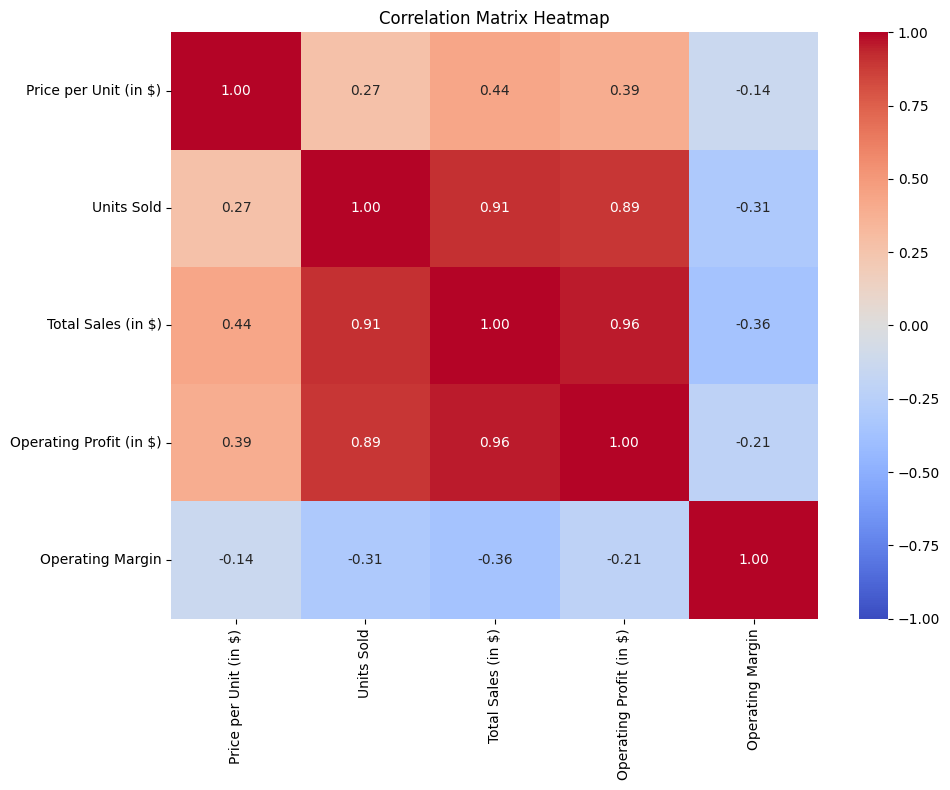

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns for correlation
numeric_columns = ['Price per Unit (in $)', 'Units Sold', 'Total Sales (in $)', 'Operating Profit (in $)', 'Operating Margin']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Round the values to 2 decimal places
correlation_matrix_rounded = correlation_matrix.round(2)

# Create a string representation of the table
table = correlation_matrix_rounded.to_string()

# Print the table
print("Correlation Matrix:")
print(table)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()